In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
d_train = pd.read_csv('./train.csv')

In [3]:
d_test = pd.read_csv('./test.csv')

In [4]:
d_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [5]:
d_train.shape

(40455, 11)

In [6]:
d_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
# not nulls yuhuuu

In [8]:
d_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

## Lets see what can we do with the categorical columns

I am going to assume that all the 3 categorical variables are important in a certain order.

This is obvious in the cut (Ideal is the best, therefore a 5 out of 5). With the color, at first I am going to assume the same, the are colors which have more market value than others. The clarity works the same as color.

####  - Cut

In [9]:
d_train.cut.value_counts()

Ideal        16230
Premium      10338
Very Good     9003
Good          3682
Fair          1202
Name: cut, dtype: int64

In [10]:
category = {
    'Ideal' : 5,
    'Premium' : 4,
    'Very Good' : 3,
    'Good' : 2,
    'Fair' : 1   
}

In [11]:
d_train.cut = d_train.cut.map(category)

In [12]:
d_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
20034,20034,0.33,3,G,VS2,59.4,61.0,4.49,4.53,2.68,6.361


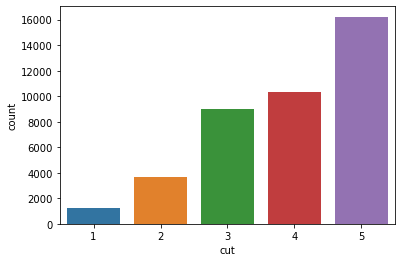

In [13]:
sns.countplot(data=d_train, x=d_train.cut);

#### - Color

In [14]:
d_train.color.value_counts()

G    8410
E    7368
F    7182
H    6203
D    5100
I    4070
J    2122
Name: color, dtype: int64

In [15]:
color_ = {
    'G' : 1,
    'E': 2,
    'F': 3,
    'H': 4,
    'D': 5,
    'I': 6,
    'J': 7
}

In [16]:
d_train.color = d_train.color.map(color_)

In [17]:
d_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
5247,5247,0.54,5,2,VS1,62.6,55.0,5.2,5.22,3.26,7.457


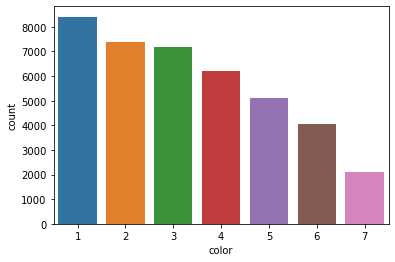

In [18]:
sns.countplot(data=d_train, x=d_train.color);

#### - Clarity

In [19]:
d_train.clarity.value_counts()

SI1     9779
VS2     9259
SI2     6921
VS1     6079
VVS2    3745
VVS1    2807
IF      1312
I1       553
Name: clarity, dtype: int64

In [20]:
calrity_ = {
    'SI2': 1, 
    'VVS2': 2, 
    'VS2': 3, 
    'VS1': 4, 
    'SI1': 5, 
    'VVS1': 6, 
    'IF': 7, 
    'I1': 8
}

In [21]:
d_train.clarity = d_train.clarity.map(calrity_)

In [22]:
d_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
4596,4596,0.38,5,6,4,62.3,53.4,4.65,4.69,2.91,6.555


In [23]:
d_train.dtypes

id           int64
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [24]:
# DONE

## Now let's see which are the 4c´s of a Diamond

This are, in  order of most valuable to least:
 
- Carat

- Color

- Clarity

- Cut

This are the most important features of a diamond, but we can not ignore other features as table, depth (z)...

In [25]:
correlation = d_train.corr()

In [26]:
correlation

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,-0.003045,-0.000372,0.003901,0.001354,-0.000405,0.000783,-0.002447,-0.001936,-0.001273,-0.003194
carat,-0.003045,1.000000,-0.131069,0.190115,-0.155426,0.023585,0.185478,0.974648,0.944419,0.947469,0.920064
cut,-0.000372,-0.131069,1.000000,-0.035514,0.035271,-0.215352,-0.431195,-0.122895,-0.117832,-0.145396,-0.084878
color,0.003901,0.190115,-0.035514,1.000000,-0.011532,0.025624,0.041443,0.172155,0.166396,0.169746,0.086188
clarity,0.001354,-0.155426,0.035271,-0.011532,1.000000,0.022249,-0.061169,-0.163722,-0.159106,-0.155915,-0.122930
depth,-0.000405,0.023585,-0.215352,0.025624,0.022249,1.000000,-0.299203,-0.029867,-0.033960,0.089474,-0.003292
table,0.000783,0.185478,-0.431195,0.041443,-0.061169,-0.299203,1.000000,0.200374,0.186788,0.153726,0.162804
x,-0.002447,0.974648,-0.122895,0.172155,-0.163722,-0.029867,0.200374,1.000000,0.967315,0.965496,0.957668
y,-0.001936,0.944419,-0.117832,0.166396,-0.159106,-0.033960,0.186788,0.967315,1.000000,0.941176,0.928909
z,-0.001273,0.947469,-0.145396,0.169746,-0.155915,0.089474,0.153726,0.965496,0.941176,1.000000,0.930014


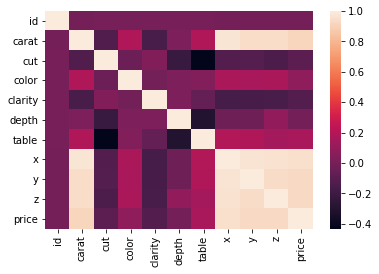

In [27]:
sns.heatmap(correlation);

## Machine Learning time!

In [28]:
# lets start with a decision tree

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = d_train.drop("price", axis=1)
y = d_train.price

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [32]:
X_train.shape

(32364, 10)

In [33]:
X_test.shape

(8091, 10)

In [35]:
y_train.shape

(32364,)

In [36]:
y_test.shape

(8091,)

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
model_tree_13 = DecisionTreeRegressor(max_depth=13)

In [96]:
model_tree_13.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13)

In [97]:
y_predict = model_tree_13.predict(X_test).round(3)

In [98]:
y_predict

array([6.646, 8.202, 6.56 , ..., 7.663, 9.21 , 7.781])

In [99]:
from sklearn import metrics

In [100]:
from sklearn.metrics import mean_squared_error

In [101]:
RMSE = (mean_squared_error(y_test, y_predict)) ** 0.5

In [102]:
RMSE

0.1241955376746559

In [103]:
# now lets do a random forest